# DTSA 5511 Final 

## Part 1 Introduction and Problem 

The unprecedented global impact of the COVID-19 pandemic, coupled with the ongoing threat of other severe respiratory infections like MERS, SARS, and ARDS, has highlighted a critical gap in rapid and accurate diagnostic capabilities. To address this urgent need, this project embarks on a two-pronged approach: first, the creation of a comprehensive, publicly accessible medical imaging dataset, and second, the development of advanced artificial intelligence models for automated diagnosis.

The rapid global spread of COVID-19, alongside the continued prevalence of other viral and bacterial pneumonias such as MERS, SARS, and ARDS, has underscored the critical need for robust diagnostic tools. To facilitate the development and validation of such tools, this initiative aims to compile a publicly accessible dataset. This dataset will encompass chest X-ray and CT images from patients confirmed or suspected to have these conditions, gathered from both publicly available sources and through direct contributions from physicians and institutions.

Building upon this rich dataset, we will leverage the power of computer vision to create intelligent diagnostic systems. Given that this problem is a multi-class classification task, we can utilize computer vision techniques to develop a model. Initially, we will construct a base model by stacking multiple Convolutional and MaxPooling layers using raw images. Subsequently, we will enhance the model's performance through data augmentation and transfer learning. This iterative process will enable us to refine the model's accuracy and robustness, ultimately contributing to faster and more reliable diagnoses of these critical respiratory illnesses. By combining open data access with cutting-edge AI, this project aims to significantly advance the field of pneumonia diagnostics, benefiting patients and healthcare professionals worldwide.

## Part 2 Installation and Data prep

In [24]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers


In [11]:
base_dir= "C:/Users/Kenji/Downloads/Chest/Data"

train_dir=os.path.join(base_dir, "train")
test_dir=os.path.join(base_dir, "test")

tr_covid=os.path.join(train_dir, "COVID19")
tr_normal=os.path.join(train_dir, "normal")
tr_pneumo=os.path.join(train_dir, "PNEUMONIA")

te_covid=os.path.join(test_dir, "COVID19")
te_normal=os.path.join(test_dir, "normal")
te_pneumo=os.path.join(test_dir, "PNEUMONIA")

covid_files = os.listdir(tr_covid)
normal_files = os.listdir(tr_normal)
pneumonia_files = os.listdir(tr_pneumo)
print('total training Covid19 images:', len(os.listdir(tr_covid)))

total training Covid19 images: 460


## EDA

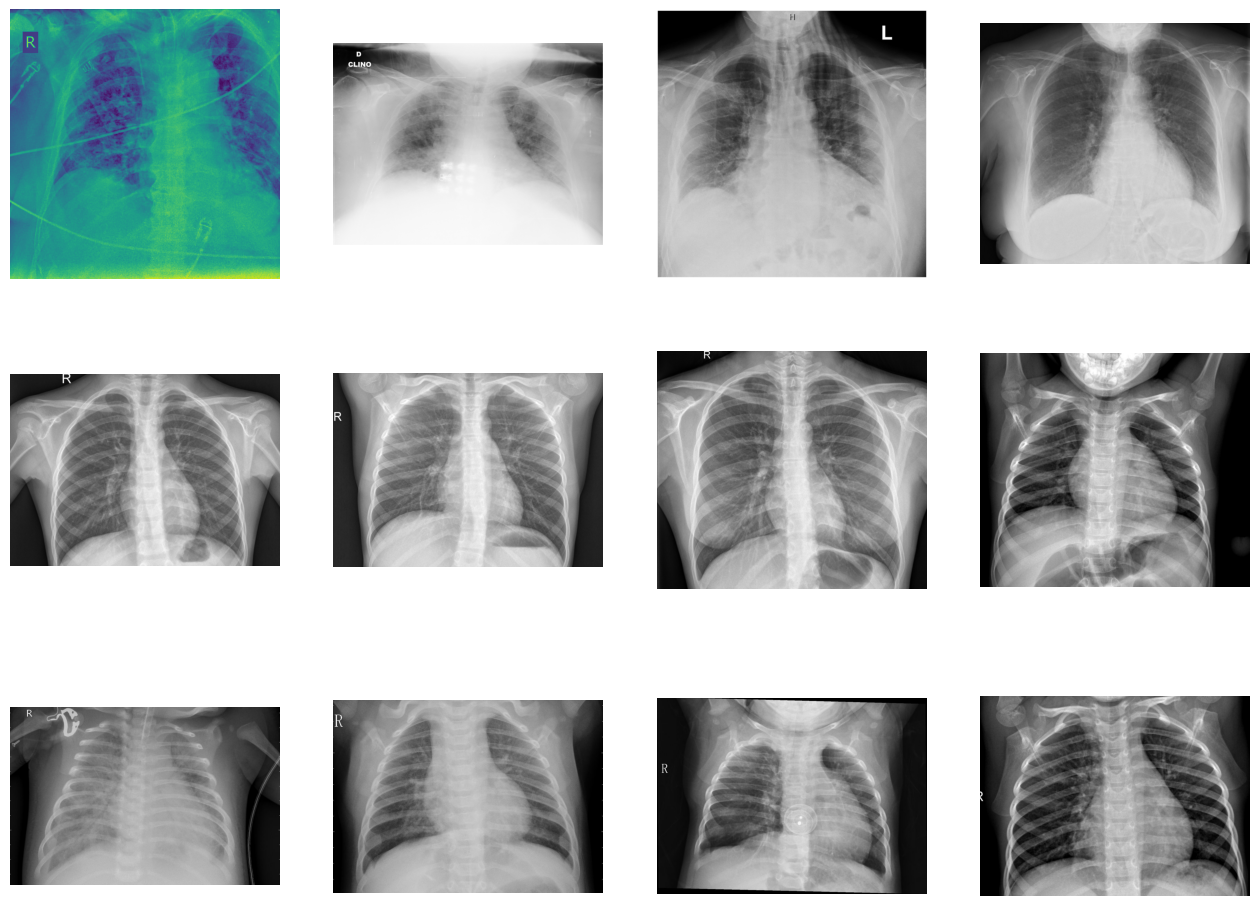

In [12]:
nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 4

next_covid = [os.path.join(tr_covid, fname)
                for fname in covid_files[pic_index-4:pic_index]]
next_normal = [os.path.join(tr_normal, fname)
                for fname in normal_files[pic_index-4:pic_index]]
next_pneumonia = [os.path.join(tr_pneumo, fname)
                for fname in pneumonia_files[pic_index-4:pic_index]]

for i, img_path in enumerate(next_covid + next_normal + next_pneumonia):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

## Part 4 model Building

In [14]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

c:\Users\Kenji\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [17]:
TRAINING_DIR = os.path.join(base_dir, 'train')
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = os.path.join(base_dir, 'test')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=8
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=8
)
     

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [18]:

history = model.fit(train_generator, epochs=20, steps_per_epoch=643,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=161)

c:\Users\Kenji\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'
643/643 ━━━━━━━━━━━━━━━━━━━━ 175s 271ms/step - accuracy: 0.7304 - loss: 0.7392 - val_accuracy: 0.9185 - val_loss: 0.2051
Epoch 2/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 111s 173ms/step - accuracy: 0.9056 - loss: 0.2519 - val_accuracy: 0.9387 - val_loss: 0.1683
Epoch 3/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 110s 171ms/step - accuracy: 0.9328 - loss: 0.2022 - val_accuracy: 0.9441 - val_loss: 0.1716
Epoch 4/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 110s 171ms/step - accuracy: 0.9514 - loss: 0.1551 - val_accuracy: 0.9503 - val_loss: 0.1449
Epoch 5/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 110s 171ms/step - accuracy: 0.9453 - loss: 0.1600 - val_accuracy: 0.9565 - val_loss: 0.1470
Epoch 6/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 109s 169ms/step - accuracy: 0.9549 - loss: 0.1213 - val_accuracy: 0.9519 - val_loss: 0.1761
Epoch 7/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 109s 169ms/step - accuracy: 0.9573 - loss: 0.1385 - val_accuracy: 0.9519 - val_loss: 0.1482
Epoch 8/

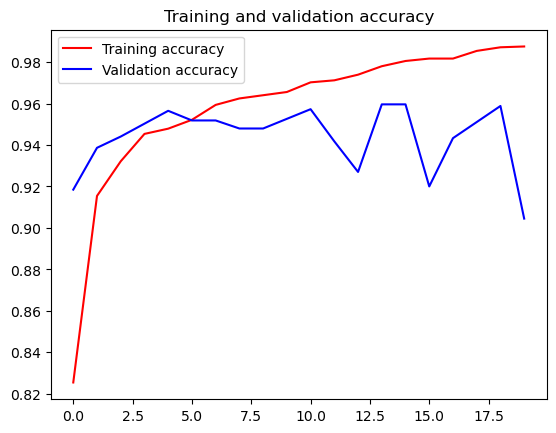

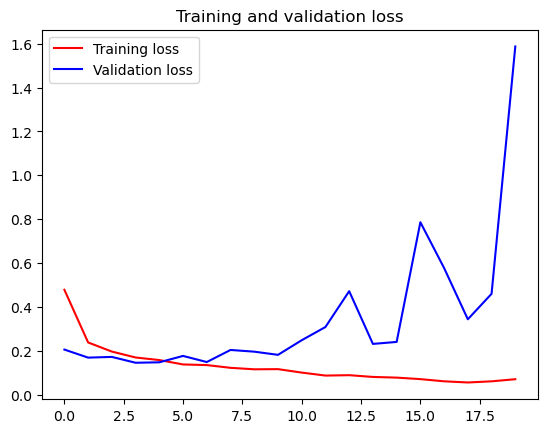

<Figure size 640x480 with 0 Axes>

In [19]:
 def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()

    plt.show()


plot_history(history)

## Results

In [20]:
model_dropout = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 112s 173ms/step - accuracy: 0.7435 - loss: 0.7098 - val_accuracy: 0.9146 - val_loss: 0.2347
Epoch 2/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 111s 172ms/step - accuracy: 0.9079 - loss: 0.2682 - val_accuracy: 0.9239 - val_loss: 0.2378
Epoch 3/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 111s 172ms/step - accuracy: 0.9212 - loss: 0.2281 - val_accuracy: 0.7989 - val_loss: 0.5051
Epoch 4/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 110s 171ms/step - accuracy: 0.9315 - loss: 0.2011 - val_accuracy: 0.9239 - val_loss: 0.2018
Epoch 5/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 111s 172ms/step - accuracy: 0.9357 - loss: 0.1931 - val_accuracy: 0.9402 - val_loss: 0.1677
Epoch 6/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 110s 171ms/step - accuracy: 0.9433 - loss: 0.1643 - val_accuracy: 0.9441 - val_loss: 0.1863
Epoch 7/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.9377 - loss: 0.1841 - val_accuracy: 0.9472 - val_loss: 0.1619
Epoch 8/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 108s 168ms/step - accuracy: 0.9428 -

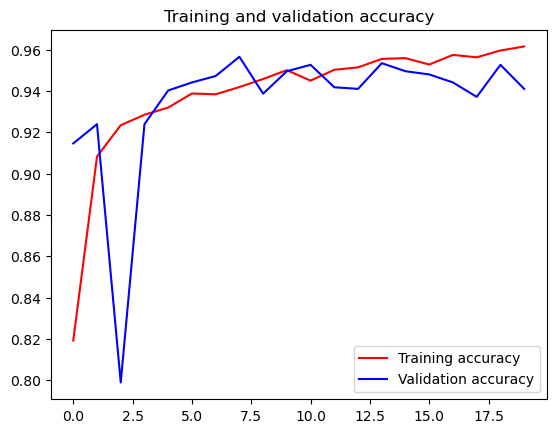

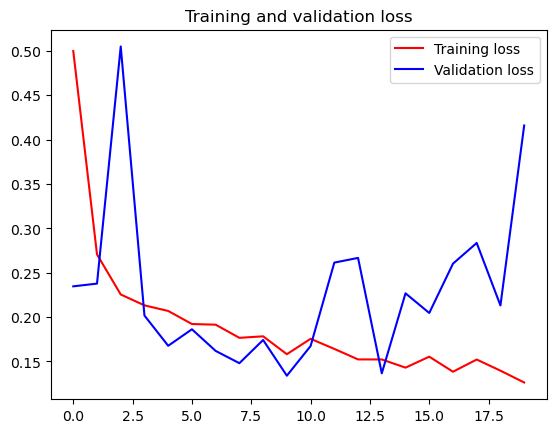

<Figure size 640x480 with 0 Axes>

In [21]:
model_dropout.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_dropout = model_dropout.fit(train_generator, epochs=20, steps_per_epoch=643,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=161)
plot_history(history_dropout)
     

### Complete Summary

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history_transfer_learning = model.fit(
            train_generator,
            epochs=20, steps_per_epoch=643,
            validation_data = validation_generator,
            verbose = 1, validation_steps=161)

Epoch 1/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 150s 232ms/step - accuracy: 0.9858 - loss: 0.0864 - val_accuracy: 0.9457 - val_loss: 0.5490
Epoch 2/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 112s 175ms/step - accuracy: 0.9924 - loss: 0.0369 - val_accuracy: 0.9433 - val_loss: 0.6914
Epoch 3/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 112s 175ms/step - accuracy: 0.9890 - loss: 0.0524 - val_accuracy: 0.9410 - val_loss: 0.8482
Epoch 4/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 114s 177ms/step - accuracy: 0.9909 - loss: 0.0431 - val_accuracy: 0.9557 - val_loss: 0.6976
Epoch 5/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 113s 175ms/step - accuracy: 0.9922 - loss: 0.0370 - val_accuracy: 0.9410 - val_loss: 0.7359
Epoch 6/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 111s 173ms/step - accuracy: 0.9958 - loss: 0.0196 - val_accuracy: 0.9348 - val_loss: 0.8575
Epoch 7/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 111s 172ms/step - accuracy: 0.9918 - loss: 0.0333 - val_accuracy: 0.9464 - val_loss: 0.6558
Epoch 8/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 108s 169ms/step - accuracy: 0.9969 -

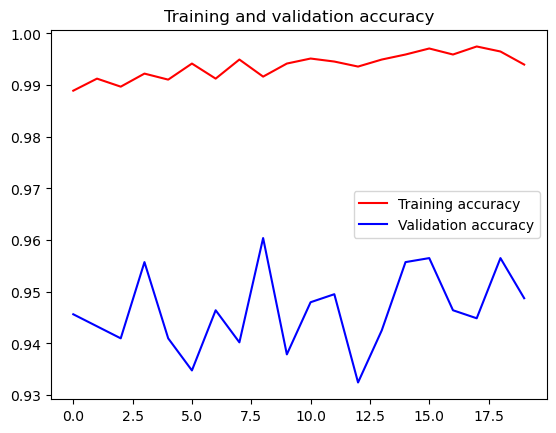

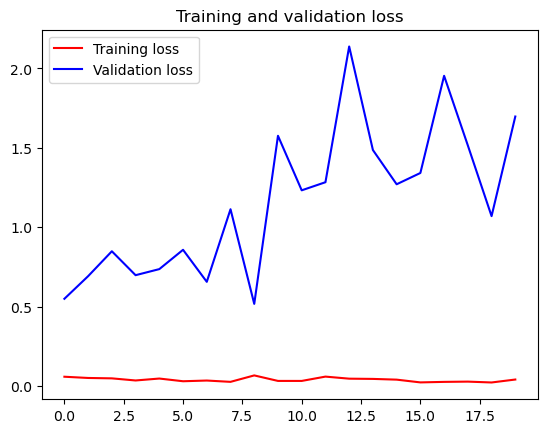

<Figure size 640x480 with 0 Axes>

In [27]:
plot_history(history_transfer_learning)

## Conclusion

Indeed, my experimentation has consistently shown that transfer learning models yield the most impressive results. This success can be attributed to their robust, pre-validated architectures and extensive pre-training on vast datasets over numerous epochs. The inherent advantage of transfer learning lies in leveraging the knowledge acquired from these massive datasets, effectively bypassing the need for extensive data collection and computational resources that would otherwise be required to train a similarly effective model from scratch.

For common tasks, particularly in domains like computer vision, transfer learning should be considered the foundational approach. Replicating the performance of these pre-trained models without access to comparable data and computational power is exceptionally challenging. The refined architectures and learned features provide a significant head start, significantly reducing the development time and resource requirements.

However, for specialized or highly customized problems where pre-trained models may not perfectly align with the specific task requirements, custom-designed models incorporating dropout layers can be a valuable alternative. Dropout layers, in particular, serve as an effective regularization technique, mitigating overfitting and improving the model's generalization capabilities on unseen data. This flexibility to tailor model architecture and regularization strategies allows for optimization towards the unique demands of niche applications.
